In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import geopandas as gpd
from shapely.geometry import Polygon
from shapely import wkt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.patches as mpatches
from sentinelsat import SentinelAPI
import pandas as pd
import datetime

from utils.utils import reproject_wkt_4326_3460

# **Data Estimates Over Fiji**

In [12]:
aois_dir = "../CS_AoIs/"
world_borders = gpd.read_file('../Ancillary_Datasets/TM_WORLD_BORDERS-0.2/TM_WORLD_BORDERS-0.2.shp') # http://thematicmapping.org/downloads/world_borders.php
overall_aoi = world_borders.loc[world_borders.NAME == 'Fiji']

# overall_aoi = gpd.read_file(aois_dir + '/Fiji_Overall_wgs84.geojson')
# overall_aoi_wkt = overall_aoi.geometry.values[0].wkt
# overall_aoi_loc = overall_aoi.to_crs({'init': 'epsg:3460'})
# core_aoi = gpd.read_file(aois_dir + '/Fiji_VitiLevu_WorldBorders_wgs84.geojson')
# core_aoi_loc = core_aoi.to_crs({'init': 'epsg:3460'})
# core2_aoi = gpd.read_file(aois_dir + '/Fiji_VitiLevuVanuaLevu_WorldBorders_wgs84.geojson')
# lspr = gpd.read_file('../CS_OpenData_AreasOfInterest/Fiji_Landsat_PathRow_fijicrs_new.geojson')

search_outputs_dir = "../CS_OpenData_SearchResults/"

### Query Data Sources & Save Results

Figure out which Sentinel-2 and Landsat tiles overlap AoI (not possible for Sentinel-1 without querying API)

In [ ]:
# Load landsat & sentinel-2 world tiles
world_s2_granules = gpd.read_file('../Ancillary_Datasets/sentinel2_tiles_world/sentinel2_tiles_world.shp')
#world_ls_granules = gpd.read_file('../Ancillary_Datasets/WRS2_descending.shp')

Query dataset availability from possible sources and save results to .csv files

In [13]:
# Query ESA Open Access Hub
esa_api = SentinelAPI('tmj21','Welcome12!')
base = search_outputs_dir
aoi = 'fiji_overall'

In [15]:
sensor = 's1'
src = 'esa'
res = esa_api.query(overall_aoi_wkt,platformname='Sentinel-1',producttype='SLC',sensoroperationalmode='IW')
esa_api.to_geodataframe(res).to_csv("{}{}_{}_{}_{}.csv".format(base, aoi, sensor, 'slc', src))
res = esa_api.query(overall_aoi_wkt,platformname='Sentinel-1',producttype='GRD',sensoroperationalmode='IW')
esa_api.to_geodataframe(res).to_csv("{}{}_{}_{}_{}.csv".format(base, aoi, sensor, 'grd', src))

src = 'esa'
sensor = 's2'
res = esa_api.query(overall_aoi_wkt,platformname='Sentinel-2',producttype='S2MSI1C')
esa_api.to_geodataframe(res).to_csv("{}{}_{}_{}_{}.csv".format(base, aoi, sensor, 'l1c', src))
res = esa_api.query(overall_aoi_wkt,platformname='Sentinel-2',producttype='S2MSI2A')
esa_api.to_geodataframe(res).to_csv("{}{}_{}_{}_{}.csv".format(base, aoi, sensor, 'l2a', src))

Querying products: 100%|██████████| 2707/2707 [01:26<00:00,  7.66 products/s]


In [22]:
src = 'asf'
sensor = 's1'

x = overall_aoi.geometry.values[0].wkt
x

'MULTIPOLYGON (((-178.7077639999999 -20.67444199999994, -178.715027 -20.67444199999994, -178.7333369999999 -20.66944499999994, -178.7372129999999 -20.66611499999993, -178.737762 -20.65972099999999, -178.7333369999999 -20.65027600000002, -178.73056 -20.64611400000001, -178.724457 -20.64472599999999, -178.720856 -20.648056, -178.705597 -20.67083700000001, -178.7077639999999 -20.67444199999994)), ((-178.211426 -19.85250499999995, -178.2164 -19.85333599999996, -178.2216799999999 -19.851112, -178.2230529999999 -19.84555399999999, -178.2216799999999 -19.83999999999992, -178.212799 -19.82749899999999, -178.209747 -19.82638899999995, -178.203918 -19.82749899999999, -178.200317 -19.83111600000001, -178.19809 -19.83583800000002, -178.200317 -19.84083899999996, -178.20166 -19.843616, -178.211426 -19.85250499999995)), ((-178.396698 -19.18500099999994, -178.41864 -19.18500099999994, -178.4230959999999 -19.18221999999997, -178.425049 -19.17750199999995, -178.4230959999999 -19.17250399999995, -178.41

In [35]:
!curl https://api.daac.asf.alaska.edu/services/search/param?granule_list=S1A_IW_SLC__1SDV_20190411T063207_20190411T063242_026738_0300B4_6882

<?xml version="1.0"?>
<metalink xmlns="http://www.metalinker.org/" version="3.0">
    <publisher><name>Alaska Satellite Facility</name><url>http://www.asf.alaska.edu/</url></publisher>
    <files>
        <file name="S1A_IW_SLC__1SDV_20190411T063207_20190411T063242_026738_0300B4_6882.zip"><resources><url type="http">https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SDV_20190411T063207_20190411T063242_026738_0300B4_6882.zip</url></resources><verification><hash type="md5">9b7e6c56ea29c635c34fb7cfc445c209</hash></verification><size>5279658581</size></file>
        <file name="S1A_IW_SLC__1SDV_20190411T063207_20190411T063242_026738_0300B4_6882.iso.xml"><resources><url type="http">https://datapool.asf.alaska.edu/METADATA_SLC/SA/S1A_IW_SLC__1SDV_20190411T063207_20190411T063242_026738_0300B4_6882.iso.xml</url></resources><verification><hash type="md5">21ca90d681cd701e898da21d993f8cd5</hash></verification><size>68114</size></file>
    </files>
</metalink>

In [37]:
!wget -c --http-user=tom_jones --http-password='Welcome12!' "https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SDV_20190411T063207_20190411T063242_026738_0300B4_6882.zip"

--2019-09-05 11:45:07--  https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SDV_20190411T063207_20190411T063242_026738_0300B4_6882.zip
Resolving datapool.asf.alaska.edu (datapool.asf.alaska.edu)... 137.229.87.137
Connecting to datapool.asf.alaska.edu (datapool.asf.alaska.edu)|137.229.87.137|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://urs.earthdata.nasa.gov/oauth/authorize?client_id=BO_n7nTIlMljdvU6kRRB3g&redirect_uri=https://vertex-retired.daac.asf.alaska.edu/services/urs4_token_request&response_type=code&state=redirect%3Ahttp%3A%2F%2Fdatapool.asf.alaska.edu%3A80%2FSLC%2FSA%2FS1A_IW_SLC__1SDV_20190411T063207_20190411T063242_026738_0300B4_6882.zip&app_type=401 [following]
--2019-09-05 11:45:08--  https://urs.earthdata.nasa.gov/oauth/authorize?client_id=BO_n7nTIlMljdvU6kRRB3g&redirect_uri=https://vertex-retired.daac.asf.alaska.edu/services/urs4_token_request&response_type=code&state=redirect%3Ahttp%3A%2F%2Fdatapool.asf.alaska.edu%3A80%2FSLC%2FS

In [21]:
!curl https://api.daac.asf.alaska.edu/services/search/param?intersectsWith=polygon\(\(176,-15,-178,-15,-178,-20,176,-20,176,-15\)\)\&platform=SA,SB\&processingLevel=SLC\&output=csv > ../Search_Discovery/Fiji_S1_SLC_ASF.csv

'MULTIPOLYGON (((-178.7077639999999 -20.67444199999994, -178.715027 -20.67444199999994, -178.7333369999999 -20.66944499999994, -178.7372129999999 -20.66611499999993, -178.737762 -20.65972099999999, -178.7333369999999 -20.65027600000002, -178.73056 -20.64611400000001, -178.724457 -20.64472599999999, -178.720856 -20.648056, -178.705597 -20.67083700000001, -178.7077639999999 -20.67444199999994)), ((-178.211426 -19.85250499999995, -178.2164 -19.85333599999996, -178.2216799999999 -19.851112, -178.2230529999999 -19.84555399999999, -178.2216799999999 -19.83999999999992, -178.212799 -19.82749899999999, -178.209747 -19.82638899999995, -178.203918 -19.82749899999999, -178.200317 -19.83111600000001, -178.19809 -19.83583800000002, -178.200317 -19.84083899999996, -178.20166 -19.843616, -178.211426 -19.85250499999995)), ((-178.396698 -19.18500099999994, -178.41864 -19.18500099999994, -178.4230959999999 -19.18221999999997, -178.425049 -19.17750199999995, -178.4230959999999 -19.17250399999995, -178.41

In [ ]:
src = 'gcloud'
sensor = 's2'

In [14]:
# Landsat taken from - https://www.usgs.gov/land-resources/nli/landsat/bulk-metadata-service
pr = lspr
sensor = 'ls'
src = 'usgs'
df = pd.read_csv('../Ancillary_Datasets/LANDSAT_8_C1.csv.gz')
df = df[df.row.isin(pr.ROW.values)&df.path.isin(pr.PATH.values)]
df.to_csv("{}{}_{}_{}_{}.csv".format(base, aoi, sensor, '8', src))

df = pd.read_csv('../Ancillary_Datasets/LANDSAT_TM_C1.csv.gz')
df = df[df.row.isin(pr.ROW.values)&df.path.isin(pr.PATH.values)]
df.to_csv("{}{}_{}_{}_{}.csv".format(base, aoi, sensor, 'TM', src))

df = pd.read_csv('../Ancillary_Datasets/LANDSAT_MSS_C1.csv.gz')
df = df[df.row.isin(pr.ROW.values)&df.path.isin(pr.PATH.values)]
df.to_csv("{}{}_{}_{}_{}.csv".format(base, aoi, sensor, 'MSS', src))

df = pd.read_csv('../Ancillary_Datasets/LANDSAT_ETM_C1.csv.gz')
df = df[df.row.isin(pr.ROW.values)&df.path.isin(pr.PATH.values)]
df.to_csv("{}{}_{}_{}_{}.csv".format(base, aoi, sensor, 'ETM', src))

Querying products: 100%|██████████| 680/680 [00:37<00:00, 12.34 products/s]


### Visualise Frames + extents

### Temporal Coverage: Monthly Volumes

### Temporal Coverage: Monthly Volumes

## **Sentinel-2 MVP Campaign**

## **Sentinel-1 MVP Campaign**

## **Landsat Campaign**

In [5]:
aois_dir = "../CS_OpenData_AreasOfInterest/"
worldborders = gpd.read_file(aois_dir + '/Z_Fiji_WorldBorders_3460.geojson')
overall_aoi = gpd.read_file(aois_dir + '/Fiji_Overall_wgs84.geojson')
overall_aoi_wkt = overall_aoi.geometry.values[0].wkt
overall_aoi_loc = overall_aoi.to_crs({'init': 'epsg:3460'})
core_aoi = gpd.read_file(aois_dir + '/Fiji_VitiLevu_WorldBorders_wgs84.geojson')
core_aoi_loc = core_aoi.to_crs({'init': 'epsg:3460'})
core2_aoi = gpd.read_file(aois_dir + '/Fiji_VitiLevuVanuaLevu_WorldBorders_wgs84.geojson')
lspr = gpd.read_file('../CS_OpenData_AreasOfInterest/Fiji_Landsat_PathRow_fijicrs_new.geojson')

search_outputs_dir = "../CS_OpenData_SearchResults/"

# **Data Estimates Over Fiji**

In [3]:
# Query ESA Open Access Hub
esa_api = SentinelAPI('tmj21','Welcome12!')
base = search_outputs_dir
aoi = 'fiji_overall'

In [204]:
sensor = 's1'
src = 'esa'
res = esa_api.query(overall_aoi_wkt,platformname='Sentinel-1',producttype='SLC',sensoroperationalmode='IW')
esa_api.to_geodataframe(res).to_csv("{}{}_{}_{}_{}.csv".format(base, aoi, sensor, 'slc', src))
res = esa_api.query(overall_aoi_wkt,platformname='Sentinel-1',producttype='GRD',sensoroperationalmode='IW')
esa_api.to_geodataframe(res).to_csv("{}{}_{}_{}_{}.csv".format(base, aoi, sensor, 'grd', src))
sensor = 's2'
res = esa_api.query(overall_aoi_wkt,platformname='Sentinel-2',producttype='S2MSI1C')
esa_api.to_geodataframe(res).to_csv("{}{}_{}_{}_{}.csv".format(base, aoi, sensor, 'l1c', src))
res = esa_api.query(overall_aoi_wkt,platformname='Sentinel-2',producttype='S2MSI2A')
esa_api.to_geodataframe(res).to_csv("{}{}_{}_{}_{}.csv".format(base, aoi, sensor, 'l2a', src))

# Landsat taken from - https://www.usgs.gov/land-resources/nli/landsat/bulk-metadata-service
pr = lspr
sensor = 'ls'
src = 'usgs'
df = pd.read_csv('../Ancillary_Datasets/LANDSAT_8_C1.csv.gz')
df = df[df.row.isin(pr.ROW.values)&df.path.isin(pr.PATH.values)]
df.to_csv("{}{}_{}_{}_{}.csv".format(base, aoi, sensor, '8', src))

df = pd.read_csv('../Ancillary_Datasets/LANDSAT_TM_C1.csv.gz')
df = df[df.row.isin(pr.ROW.values)&df.path.isin(pr.PATH.values)]
df.to_csv("{}{}_{}_{}_{}.csv".format(base, aoi, sensor, 'TM', src))

df = pd.read_csv('../Ancillary_Datasets/LANDSAT_MSS_C1.csv.gz')
df = df[df.row.isin(pr.ROW.values)&df.path.isin(pr.PATH.values)]
df.to_csv("{}{}_{}_{}_{}.csv".format(base, aoi, sensor, 'MSS', src))

df = pd.read_csv('../Ancillary_Datasets/LANDSAT_ETM_C1.csv.gz')
df = df[df.row.isin(pr.ROW.values)&df.path.isin(pr.PATH.values)]
df.to_csv("{}{}_{}_{}_{}.csv".format(base, aoi, sensor, 'ETM', src))

Querying products: 100%|██████████| 2553/2553 [01:18<00:00, 28.87 products/s]


### Frames + extents

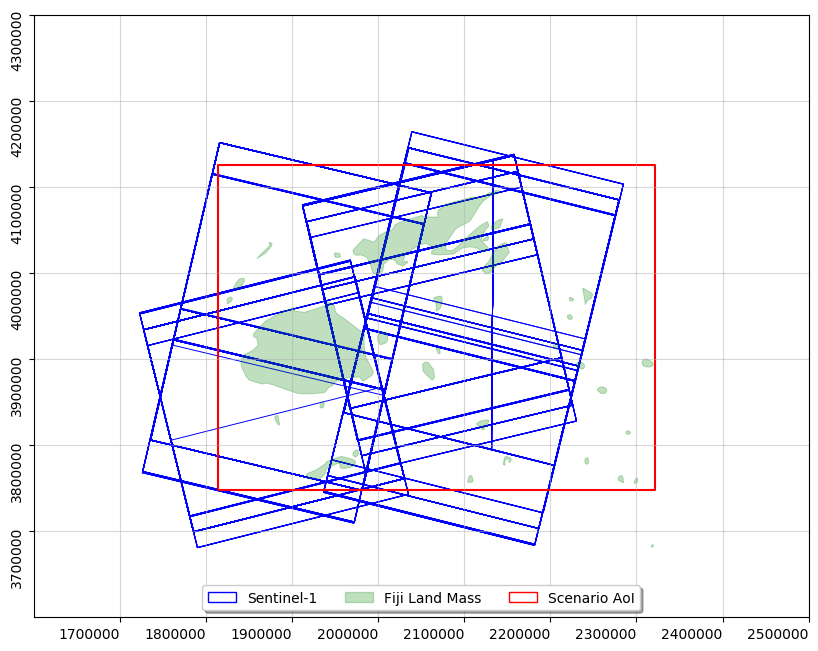

In [218]:
fig, ax = plt.subplots(figsize=(10,10),dpi=100)
fig.autofmt_xdate()
leg_patches=[]

# # S2
# df = pd.read_csv(search_outputs_dir + 'fiji_overall_s2_l1c_esa.csv')
# df['s2platform'] = df['identifier'].str[:3]
# df['Acquisition Date'] = pd.to_datetime(df['beginposition'], format='%Y-%m-%d', utc=True)
# # df = df[(df['Acquisition Date']>pd.Timestamp("2017-01-01", tz='utc')) & (df['Acquisition Date']<pd.Timestamp("2020-1-1", tz='utc'))]
# df['geometry'] = df['geometry'].apply(wkt.loads)
# df['geometry'] = df['geometry'].apply(lambda x: reproject_wkt_4326_3460(str(x)))
# df['geometry'] = df['geometry'].apply(wkt.loads)
# gdf = gpd.GeoDataFrame(df, geometry='geometry', crs=('epsg:3460'))
# gdf.plot(facecolor="none", edgecolor='g', lw=0.7, ax=ax, alpha=0.5)
# leg_patches.append(mpatches.Patch(facecolor='none',edgecolor='g', label='Sentinel-2', alpha=0.5))

# S1 = SAME IN ANY SCENARIO
df = pd.read_csv(search_outputs_dir + 'fiji_overall_s1_grd_esa.csv')
df['s1platform'] = df['identifier'].str[:3]
df['Acquisition Date'] = pd.to_datetime(df['beginposition'], format='%Y-%m-%d', utc=True)
# df = df[(df['Acquisition Date']>pd.Timestamp("2017-01-01", tz='utc')) & (df['Acquisition Date']<pd.Timestamp("2020-1-1", tz='utc'))]
df['geometry'] = df['geometry'].apply(wkt.loads)
df['geometry'] = df['geometry'].apply(lambda x: reproject_wkt_4326_3460(str(x)))
df['geometry'] = df['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs=('epsg:3460'))
gdf.plot(facecolor="none", edgecolor='b', lw=0.7, ax=ax)
leg_patches.append(mpatches.Patch(facecolor='none',edgecolor='b', label='Sentinel-1'))

# # LS
# lspr.plot(facecolor="none", edgecolor='y', alpha=1, lw=1, ax=ax)
# leg_patches.append(mpatches.Patch(facecolor='none',edgecolor='y', alpha=1, label='Landsat'))

# WORLD BORDERS
worldborders.plot(facecolor="g", edgecolor='g', alpha=0.25, lw=0.7, ax=ax)
leg_patches.append(mpatches.Patch(facecolor='g',edgecolor='g', alpha=0.25, label='Fiji Land Mass'))

# SCENARIO AOI
overall_aoi_loc.envelope.plot(facecolor="none", edgecolor='r', lw=1.5, ax=ax)
leg_patches.append(mpatches.Patch(facecolor='none',edgecolor='red', label='Scenario AoI'))

#ax.set_title('Fiji Scenario 1: Viti Levu only')
ax.legend(handles=leg_patches, loc='lower center', shadow=True, ncol=5);
ax.grid(alpha=0.5);
ax.tick_params(axis='y', rotation=90);
ax.tick_params(axis='x', rotation=0);
ax.set_xlim(1600001, 2500000);
ax.set_ylim(3600001, 4300000);

### Temporal Coverage: Monthly Volumes

/home/tj/miniconda3/envs/cs/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/home/tj/miniconda3/envs/cs/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


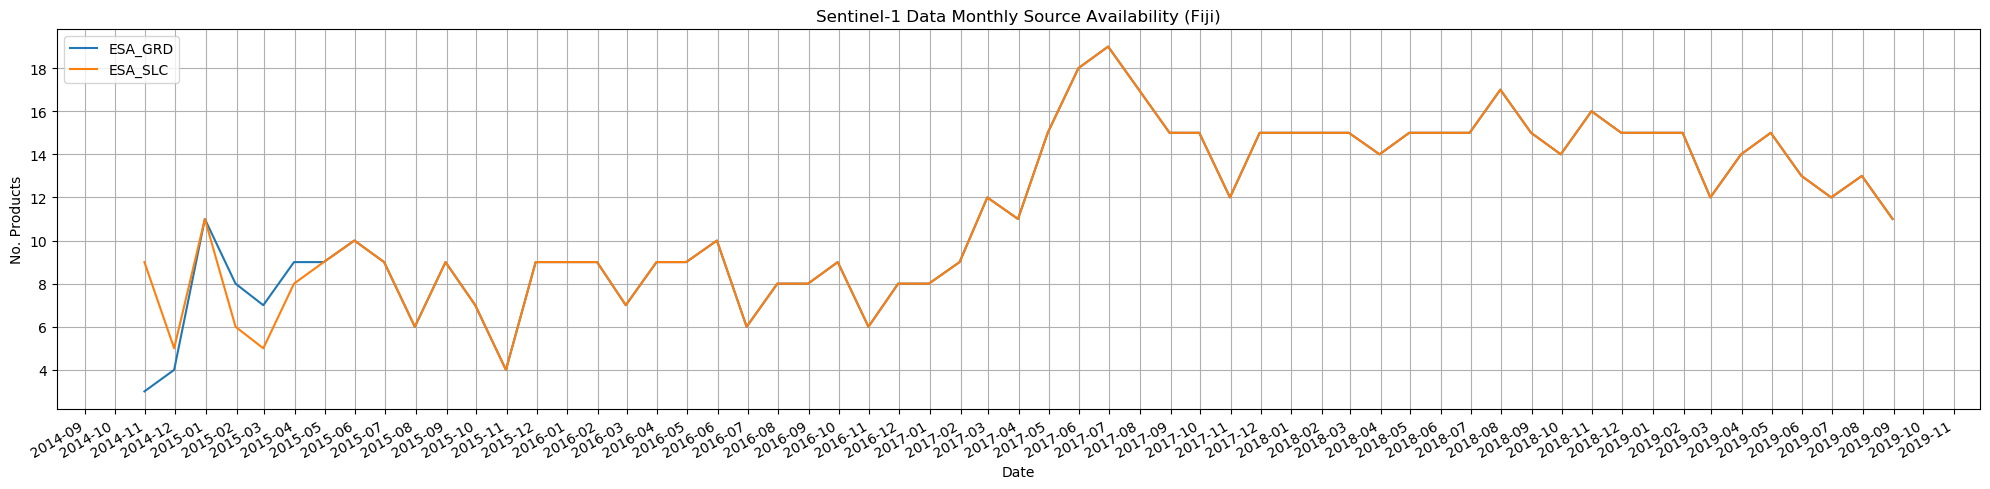

In [18]:
# Create monthly data availability plot from each data source.
fig, ax = plt.subplots(figsize=(20,5),dpi=100)
fig.autofmt_xdate()

df = pd.read_csv(search_outputs_dir + 'fiji_overall_s1_slc_esa.csv')
#print('ESA GRD \n', 'No. Prods: ', len(df))
df['Acquisition Date'] = pd.to_datetime(df['beginposition'], format='%Y-%m-%dT%H:%M:%S', utc=True)
# Convert dates into datetime objects
df['Acquisition Date'] = pd.to_datetime(df['Acquisition Date'], format='%Y-%m-%dT%H:%M:%S', utc=True)
df = df['Acquisition Date'].groupby(df['Acquisition Date'].dt.to_period("M")).agg('count')
df.index.to_timestamp(freq ='M').values
ax.plot(df.index.to_timestamp(freq ='M').values, df.values);

df = pd.read_csv(search_outputs_dir + 'fiji_overall_s1_grd_esa.csv')
#print('ESA SLC \n', 'No. Prods: ', len(df))
df['Acquisition Date'] = pd.to_datetime(df['beginposition'], format='%Y-%m-%dT%H:%M:%S', utc=True)
# Convert dates into datetime objects
df['Acquisition Date'] = pd.to_datetime(df['Acquisition Date'], format='%Y-%m-%dT%H:%M:%S', utc=True)
df = df['Acquisition Date'].groupby(df['Acquisition Date'].dt.to_period("M")).agg('count')
df.index.to_timestamp(freq ='M').values
ax.plot(df.index.to_timestamp(freq ='M').values, df.values);

#'bD-.'
ax.set_ylabel("No. Products");
ax.set_xlabel("Date");
#ax.set_ylim(0,40)
ax.legend(['ESA_GRD','ESA_SLC'], loc='upper left');
#ax.legend.loc('upper left')
ax.set_title('Sentinel-1 Data Monthly Source Availability (Fiji)');
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m") ) 
ax.grid();
fig.tight_layout();
# fig.savefig('../Search_Discovery/Fiji_S1_Monthly_Source_Availability');

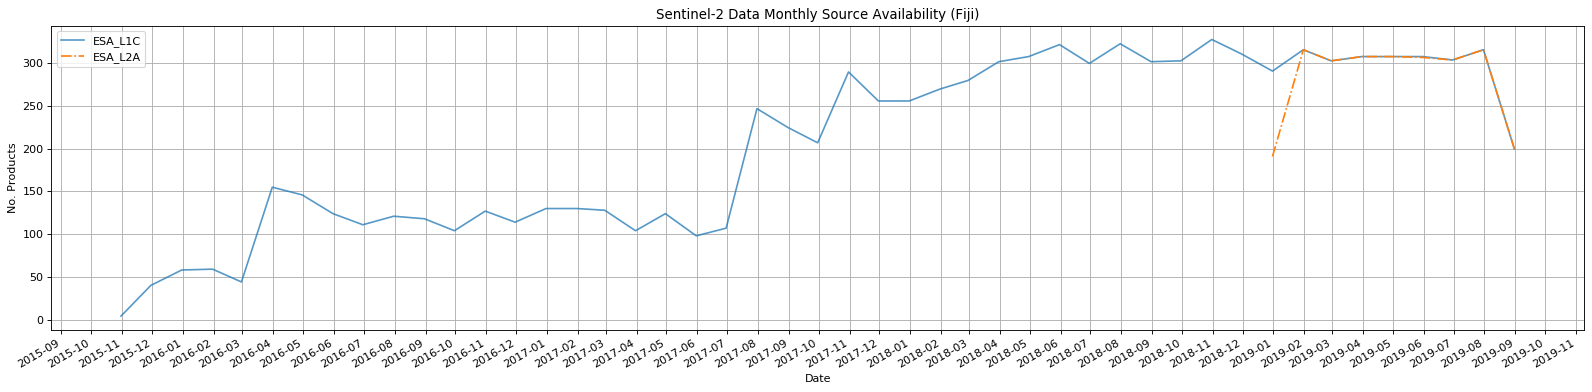

In [26]:
# Create monthly data availability plot from each data source.
fig, ax = plt.subplots(figsize=(20,5),dpi=80)
fig.autofmt_xdate()

df = pd.read_csv(search_outputs_dir + 'fiji_overall_s2_l1c_esa.csv')
#print('ESA GRD \n', 'No. Prods: ', len(df))
df['Acquisition Date'] = pd.to_datetime(df['beginposition'], format='%Y-%m-%dT%H:%M:%S', utc=True)
# Convert dates into datetime objects
df['Acquisition Date'] = pd.to_datetime(df['Acquisition Date'], format='%Y-%m-%dT%H:%M:%S', utc=True)
df = df['Acquisition Date'].groupby(df['Acquisition Date'].dt.to_period("M")).agg('count')
df.index.to_timestamp(freq ='M').values
ax.plot(df.index.to_timestamp(freq ='M').values, df.values, alpha=0.75);

df = pd.read_csv(search_outputs_dir + 'fiji_overall_s2_l2a_esa.csv')
#print('ESA SLC \n', 'No. Prods: ', len(df))
df['Acquisition Date'] = pd.to_datetime(df['beginposition'], format='%Y-%m-%dT%H:%M:%S', utc=True)
# Convert dates into datetime objects
df['Acquisition Date'] = pd.to_datetime(df['Acquisition Date'], format='%Y-%m-%dT%H:%M:%S', utc=True)
df = df['Acquisition Date'].groupby(df['Acquisition Date'].dt.to_period("M")).agg('count')
df.index.to_timestamp(freq ='M').values
ax.plot(df.index.to_timestamp(freq ='M').values, df.values, ls='dashdot');


#'bD-.'
ax.set_ylabel("No. Products");
ax.set_xlabel("Date");
#ax.set_ylim(0,40)
ax.legend(['ESA_L1C','ESA_L2A','GCloud_L1C','ASF_SLC'], loc='upper left');
#ax.legend.loc('upper left')
ax.set_title('Sentinel-2 Data Monthly Source Availability (Fiji)');
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m") ) 
ax.grid();
fig.tight_layout();
#fig.savefig('../Search_Discovery/Fiji_S1_Monthly_Source_Availability');

Landsat 8 
 No. Prods:  1638
Landsat ETM 
 No. Prods:  1255
Landsat TM 
 No. Prods:  129
Landsat MSS 
 No. Prods:  63


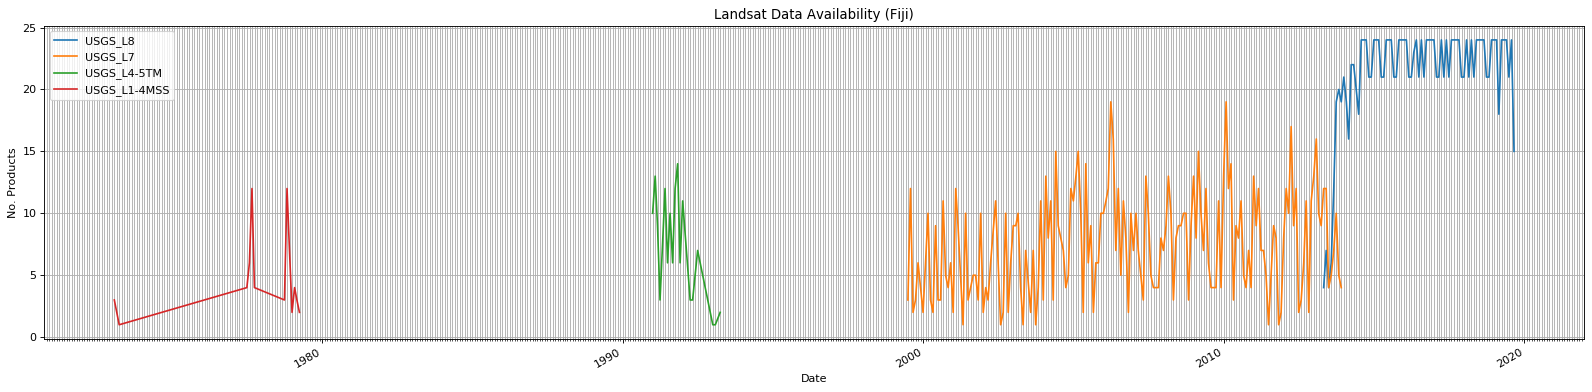

In [25]:
fig, ax = plt.subplots(figsize=(20,5),dpi=80)
fig.autofmt_xdate()

df = pd.read_csv(search_outputs_dir + 'fiji_overall_ls_8_usgs.csv')
#print('Landsat 8 \n', 'No. Prods: ', len(df))
df['Acquisition Date'] = pd.to_datetime(df['acquisitionDate'], format='%Y-%m-%d', utc=True)
df = df['Acquisition Date'].groupby(df['Acquisition Date'].dt.to_period("M")).agg('count')
df.index.to_timestamp(freq ='M').values
ax.plot(df.index.to_timestamp(freq ='M').values, df.values);

df = pd.read_csv(search_outputs_dir + 'fiji_overall_ls_ETM_usgs.csv')
#print('Landsat ETM \n', 'No. Prods: ', len(df))
df['Acquisition Date'] = pd.to_datetime(df['acquisitionDate'], format='%Y-%m-%d', utc=True)
df = df['Acquisition Date'].groupby(df['Acquisition Date'].dt.to_period("M")).agg('count')
df.index.to_timestamp(freq ='M').values
ax.plot(df.index.to_timestamp(freq ='M').values, df.values);

df = pd.read_csv(search_outputs_dir + 'fiji_overall_ls_TM_usgs.csv')
#print('Landsat TM \n', 'No. Prods: ', len(df))
df['Acquisition Date'] = pd.to_datetime(df['acquisitionDate'], format='%Y-%m-%d', utc=True)
df = df['Acquisition Date'].groupby(df['Acquisition Date'].dt.to_period("M")).agg('count')
df.index.to_timestamp(freq ='M').values
ax.plot(df.index.to_timestamp(freq ='M').values, df.values);

df = pd.read_csv(search_outputs_dir + 'fiji_overall_ls_MSS_usgs.csv')
#print('Landsat MSS \n', 'No. Prods: ', len(df))
df['Acquisition Date'] = pd.to_datetime(df['acquisitionDate'], format='%Y-%m-%d', utc=True)
df = df['Acquisition Date'].groupby(df['Acquisition Date'].dt.to_period("M")).agg('count')
df.index.to_timestamp(freq ='M').values
ax.plot(df.index.to_timestamp(freq ='M').values, df.values);

ax.set_ylabel("No. Products");
ax.set_xlabel("Date");
ax.legend(['USGS_L8','USGS_L7','USGS_L4-5TM','USGS_L1-4MSS']);
ax.set_title('Landsat Data Availability (Fiji)');
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(DateFormatter("%Y") ) 
ax.xaxis.set_minor_locator(mdates.MonthLocator())
#ax.xaxis.set_minor_formatter(DateFormatter("%m") ) 
ax.grid(which='both')
fig.tight_layout()
#fig.savefig('../Search_Discovery/LS_Summary_AqNo');

### Data Volumes

In [55]:
ls_tot = 0
df = pd.read_csv(search_outputs_dir + 'fiji_overall_ls_8_usgs.csv')
ls_tot += len(df)
print('Landsat 8 \n', 'No. Prods: ', len(df))
df = pd.read_csv(search_outputs_dir + 'fiji_overall_ls_ETM_usgs.csv')
ls_tot += len(df)
print('Landsat ETM \n', 'No. Prods: ', len(df))
df = pd.read_csv(search_outputs_dir + 'fiji_overall_ls_TM_usgs.csv')
ls_tot += len(df)
print('Landsat TM \n', 'No. Prods: ', len(df))
df = pd.read_csv(search_outputs_dir + 'fiji_overall_ls_MSS_usgs.csv')
ls_tot += len(df)
print('Landsat MSS \n', 'No. Prods: ', len(df))
print('TOTAL LANDSAT \n', 'No. Prods: ', ls_tot)
print(' Rough storage est.: ', (ls_tot * 500)/1000000, 'TB' ) # est avg filesize 500 MB

df = pd.read_csv(search_outputs_dir + 'fiji_overall_s1_grd_esa.csv')
s1_tot = len(df)
print('TOTAL SENTINEL-1 \n', 'No. Prods: ', len(df))
print(' Rough storage est.: ', (s1_tot * 1500)/1000000, 'TB' ) # est avg filesize 1500 MB

df = pd.read_csv(search_outputs_dir + 'fiji_overall_s2_l1c_esa.csv')
s1_tot = len(df)
print('TOTAL SENTINEL-2 \n', 'No. Prods: ', len(df))
print(' Rough storage est.: ', (s1_tot * 750)/1000000, 'TB' ) # est avg filesize 750 MB

Landsat 8 
 No. Prods:  1638
Landsat ETM 
 No. Prods:  1255
Landsat TM 
 No. Prods:  129
Landsat MSS 
 No. Prods:  63
TOTAL LANDSAT 
 No. Prods:  3085
 Rough storage est.:  1.5425 TB
TOTAL SENTINEL-1 
 No. Prods:  672
 Rough storage est.:  1.008 TB
TOTAL SENTINEL-2 
 No. Prods:  9630
 Rough storage est.:  7.2225 TB


In [33]:
df.head(2)
for i in df.columns.values: print(i)

Unnamed: 0
PANCHROMATIC_LINES
NADIR_OFFNADIR
sunAzimuth
REFLECTIVE_SAMPLES
upperLeftCornerLongitude
cloudCover
MAP_PROJECTION_L1
cartURL
sunElevation
path
BPF_NAME_TIRS
THERMAL_LINES
GROUND_CONTROL_POINTS_MODEL
row
imageQuality1
REFLECTIVE_LINES
ELLIPSOID
GEOMETRIC_RMSE_MODEL
browseURL
browseAvailable
dayOrNight
CPF_NAME
DATA_TYPE_L1
THERMAL_SAMPLES
upperRightCornerLatitude
lowerLeftCornerLatitude
sceneStartTime
dateUpdated
sensor
PANCHROMATIC_SAMPLES
GROUND_CONTROL_POINTS_VERSION
LANDSAT_PRODUCT_ID
acquisitionDate
upperRightCornerLongitude
PROCESSING_SOFTWARE_VERSION
GRID_CELL_SIZE_REFLECTIVE
lowerRightCornerLongitude
lowerRightCornerLatitude
sceneCenterLongitude
COLLECTION_CATEGORY
GRID_CELL_SIZE_PANCHROMATIC
BPF_NAME_OLI
sceneCenterLatitude
CLOUD_COVER_LAND
lowerLeftCornerLongitude
GEOMETRIC_RMSE_MODEL_X
GEOMETRIC_RMSE_MODEL_Y
sceneStopTime
upperLeftCornerLatitude
UTM_ZONE
DATE_L1_GENERATED
GRID_CELL_SIZE_THERMAL
DATUM
COLLECTION_NUMBER
sceneID
RLUT_FILE_NAME
TIRS_SSM_MODEL
ROLL_ANG